Aquesta és la tasca del Lliurament 2 del mòdul Sistemes d'Aprenentatge Automàtic.

Té cinc preguntes amb quatre apartats cadascuna, totes amb la mateixa puntuació.

# Descens de gradient

Explorau l'efecte de la taxa d'aprenentatge sobre l'algorisme de descens del gradient al simulador que trobareu a https://uclaacm.github.io/gradient-descent-visualiser/#playground

Triau com a funció $10sin(x)$ (haureu d'escriure el coeficient) i com a punt d'inici $x=2$.

Primer, explorau com l'algorisme convergeix a diferents mínims segons quin és el punt inicial que triam.

A continuació, indicau si l'algorisme presenta un comportament **convergent**, **divergent** o **oscil·latori** per als següents valors de la taxa d'aprenentatge.

**a) $\alpha = .125$**

![](img/125%200.png)

![](img/125%201.png)

Como se puede observar para una tasa de aprendizaje de 0.125, el algoritmo se comporta dde forma convergente y aproximadamente en las 28 iteraciones los decimales que calcula esta herramienta web serán constantes (converge a las pocas iteraciones).

**b) $\alpha = .25$**

![](img/25%200.png)

![](img/25%201.png)

En el caso de una tasa de aprendizaje de 0.25 el comportamiento es oscilatorio enre los puntos **3.581286394734132** y **5.843491566035926**.

**c) $\alpha = .5$**

![](img/5%200.png)

![](img/5%201.png)

Para el caso de tasa de aprendizaje de 0.5 el algoritmo se tiene un comportamiento divergente como se puede observar en la captura de pantalla.

**d) Com es comporta l'algorisme si en lloc de triar una taxa d'aprenentatge positiva la triam negativa?**

![](img/neg%20125.png)

![](img/neg%2025.png)

![](img/neg%205.png)

Como se puede ver en las capturas de pantalla, el comportamiento es exactamente igual que en los casos anteriores con tasas de aprendizaje con valores positivos. Difieren en los casos oscilatorios y convergentes en los puntos sobre el eje X en los que oscilan o converge respectivamente.

# Regressió logística

Al codi següent, extret de https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py afegiu-hi les línies que necessiteu i responeu les qüestions següents, referides a la regressió logística.

a) Quin és el valor del pes **w**?

b) Quin és el valor del biaix **b**?

c) Quin punt de tall en x marca la frontera entre la classe positiva i la negativa?

d) Quin paràmetre de regularització s'utilitza?

Weight coeficient value (w): 6.866805804226174
Bias value (b): -1.638899398538546
X value where the Logistic Regression cuts (prob 50%): 0.23866983358257865
Regularization parameter (C): 100000.0


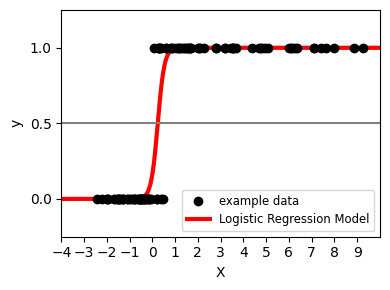

In [255]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

from sklearn.linear_model import LogisticRegression

# Generate the dataset
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)
X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

#### Modified code for the task ####
print(f'Weight coeficient value (w): {clf.coef_[0, 0]}') # Format it so it just displays the number
print(f'Bias value (b): {clf.intercept_[0]}')
print(f'X value where the Logistic Regression cuts (prob 50%): {-clf.intercept_[0] / clf.coef_[0, 0]}')
print(f'Regularization parameter (C): {1e5}')
#### End

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()


# Màquines de suport vectorial

Aplicau els quatre classificadors basats en SVM de la pàgina https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html al problema de la XOR. El codi que necessitam ja està copiat aquí al quadern, no l'heu de dur de la web.

a) Generau $400$ punts amb coordenades $x[:,0]$ i $x[:,1]$ aleatòries uniformement repartides entre $-1$ i $1$.
https://numpy.org/doc/1.15/reference/generated/numpy.random.rand.html

In [256]:
import numpy as np

np.random.seed(1) # Set the data to be the same
X_data = np.random.uniform(-1, 1, (400, 2))

b) Per a cada punt, assignau l'etiqueta de classe $y$ igual a $1$ si les dues coordenades són del mateix signe i $0$ si són de signe oposat.

In [257]:
y_data = np.where((X_data[:, 0] * X_data[:, 1] > 0), 1, 0)

c) Visualitzau les dades que heu generat. Heu d'obtenir un gràfic semblant al de l'apartat dels apunts de SVM amb kernel.

Per aconseguir-ho, executau la cel·la següent, que modelitzarà les dades que heu generat.

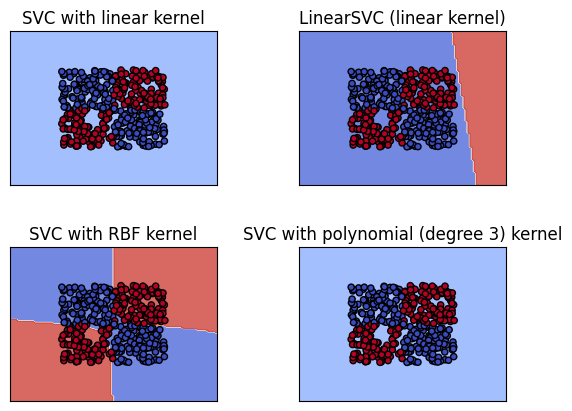

In [258]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
#! Modded this code so it matches the variable's names
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X_data, y_data) for clf in models) 

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_data[:, 0], X_data[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_data,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
    )
    ax.scatter(X0, X1, c=y_data, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Observau que el model que millor s'ajusta a les dades és el que utilitza kernel RBF.

d) Finalment, explorem la influència del paràmetre $\gamma$ en la simetria del model. Per això, en lloc de mostrar quatre models diferents, ara mostrareu nou variants d'un mateix model, el de kernel RBF amb nou valors diferents de $\gamma$, de $0.1$ a $0.9$. Copiau el codi de la cel·la anterior en la següent i modificau-lo de forma que es puguin veure simultàniament els nou gràfics. Haureu de canviar els paràmetres de `subplot`, els `title`...

Quin valor de $\gamma$ és el que dona un resultat més simètric?

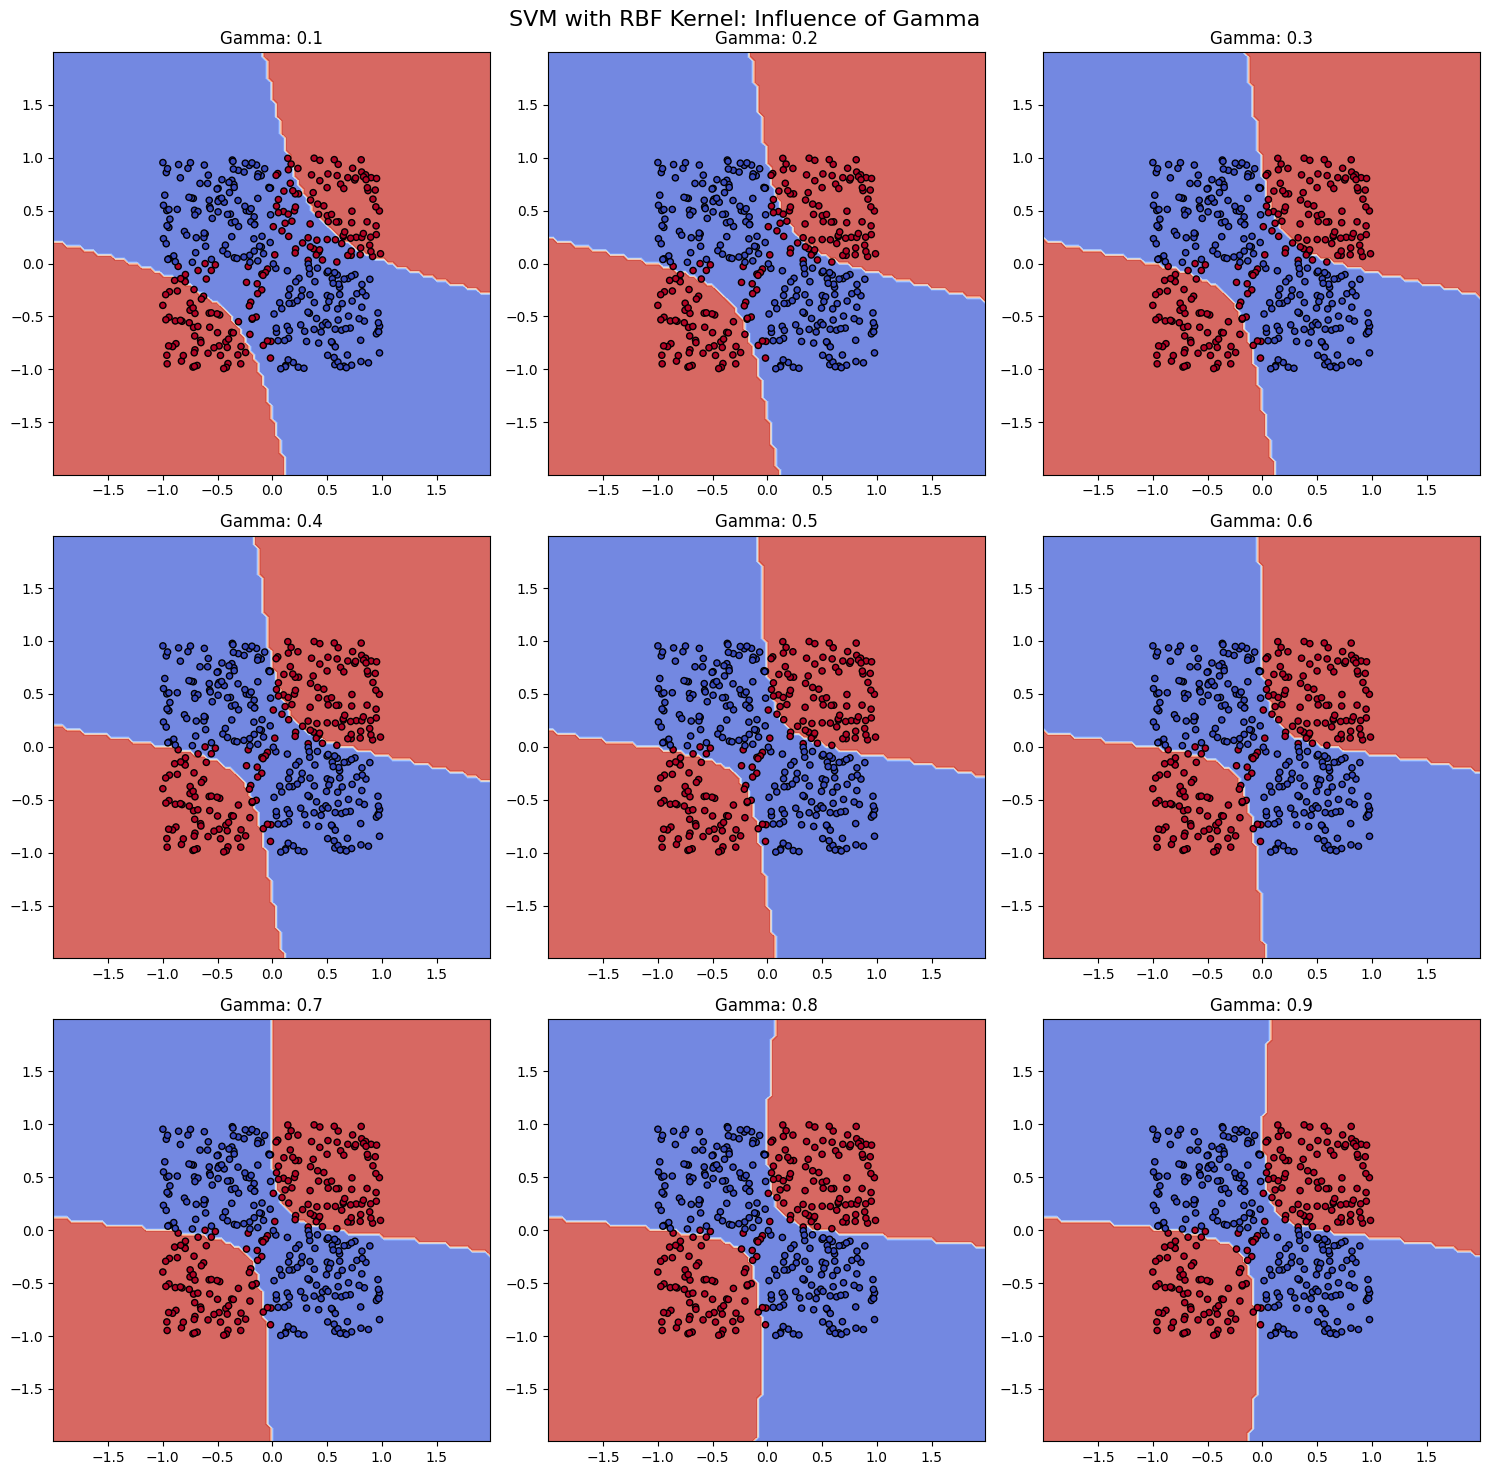

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

#? Use same X_data and y_data variables to plot data

gamma_values = np.linspace(0.1, 0.9, 9)
models = [svm.SVC(kernel='rbf', gamma=gamma, C=1.0).fit(X_data, y_data) for gamma in gamma_values]
titles = [f'Gamma: {gamma:.1f}' for gamma in gamma_values]
fig, sub = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X_data[:, 0], X_data[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X_data,
        response_method='predict',
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
    )
    ax.scatter(X0, X1, c=y_data, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_title(title)

fig.suptitle('SVM with RBF Kernel: Influence of Gamma', fontsize=16)
plt.tight_layout()
plt.show()

En cuanto a la pregunta de qué valor de gamma resulta el más simétrico para el set de datos generado en este ejercicio, responderé diciendo que a partir de 0.7 se observa una mayor precisión en comparación con los valores inferiores, creando una superficie en la que coinciden más puntos con respecto a los anteriores, además de no tener una diferencia notable con los dos valores restantes para gamma en este ejercicio.

# Arbres de decisió

Modificau l'exemple d'arbre de decisió que trobareu a https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html de forma que utilitzi les mateixes característiques que als apunts: la longitud i l'amplada del pètal. Hi ha un requadre al [quadern de classificació](https://colab.research.google.com/drive/1IC31YREPePBlheVHL3zLL1vW4Sb5NFQk?usp=sharing) sota el títol **Preparació de les dades** on se seleccionen aquestes característiques.

Distribuïu el codi en els cinc apartats següents.

### Importacions i càrrega de les dades

In [260]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:',np.unique(y)) # Comment this line -> Copied from the colab file

Class labels: [0 1 2]


### Generació de la graella de punts

In [261]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_mesh, y_mesh = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01),
)

### Ajust del model i predicció

In [262]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X, y)

grid = np.c_[x_mesh.ravel(), y_mesh.ravel()]
y_pred = tree.predict(grid).reshape(x_mesh.shape)

### Visualització de les zones de decisió i de les dades d'entrenament

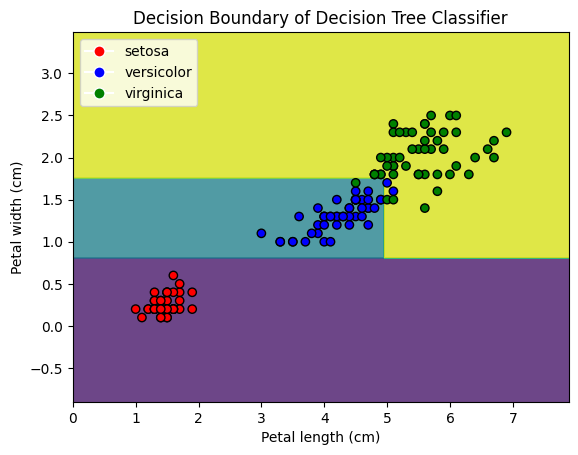

In [263]:
# Define custom colormap so the scatter and legends dots are labeled equally
cmap = ListedColormap(["red", "blue", "green"])

display = DecisionBoundaryDisplay(
    xx0=x_mesh, xx1=y_mesh, response=y_pred)
display.plot(alpha=0.8)

scatter = display.ax_.scatter(
    X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor="k", label=iris.target_names
)

display.ax_.set_xlabel("Petal length (cm)")
display.ax_.set_ylabel("Petal width (cm)")
display.ax_.set_title("Decision Boundary of Decision Tree Classifier")
legend_labels = [
	# This code has been provided by chatGPT since I could not realize how to make both legend and plot points colors to be the same
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=cmap(i), label=class_name, markersize=8)
    for i, class_name in enumerate(iris.target_names)
]
display.ax_.legend(handles=legend_labels, loc="upper left")
plt.show()

Quan executeu el codi podreu observar la forma característica de les fronteres en els arbres de decisió, formada per segments paral·lels als eixos.

# Classificació k-nearest neighbours


En aquesta darrera pregunta explorarem l'efecte del nombre de veïns $k$ en l'algorisme KNN i ho relacionarem amb l'infraajust o sobreajust del model.

El codi està tot desenvolupat, la vostra feina aquí és interpretar els resultats i modificar qualque paràmetre numèric.

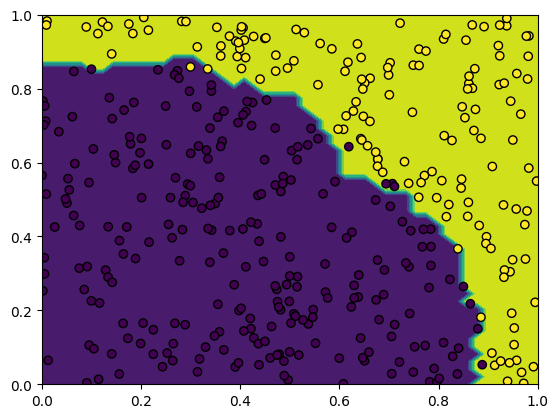

In [264]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

X=np.random.rand(400,2)

y=((X[:,0]**2+X[:,1]**2)>.8).astype(int)

feature_1, feature_2 = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
knn = KNeighborsClassifier(n_neighbors=11).fit(X, y)
y_pred = np.reshape(knn.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
     xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()
display.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black")

plt.show()



a) Per què convé que el nombre de veïns sigui senar?

b) Explicau per què no tots els punts de dades estan classificats correctament.

c) Quin valor de $k$ garantiria que tots els punts de dades estarien classificats correctament? Podeu comprovar-ho experimentant al codi.

d) Quin problema presentaria en aquest cas el model, infraajust o sobreajust?